In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image
import os

# Input data files are available in the read-only "../input/" directory

for dirname, _, filenames in os.walk('shapes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
im=image.imread('shapes/squares/drawing(1).png')


FileNotFoundError: [Errno 2] No such file or directory: 'shapes/squares/drawing(1).png'

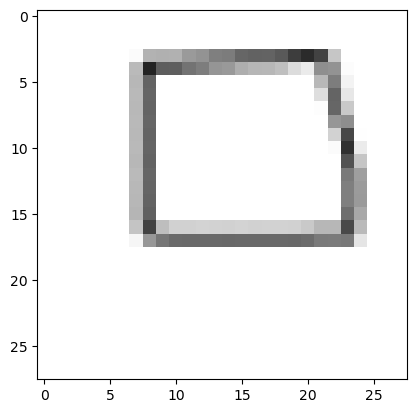

In [3]:
plt.imshow(im)

In [9]:
#Flattening the images, makes each image into 1d-array -> with the output
from PIL import Image
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            c=0
            img=Image.open(impath+i+'/'+j)
            img=img.resize(size=(32,32))
            img=img.convert('L')
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label

In [20]:
x,y=load_imgs('shapes/shapes/')
x.shape,len(y)
len(x[0])


1024

In [13]:
target=pd.Series(y,dtype='category')
target

0        circles
1        circles
2        circles
3        circles
4        circles
         ...    
295    triangles
296    triangles
297    triangles
298    triangles
299    triangles
Length: 300, dtype: category
Categories (3, object): ['circles', 'squares', 'triangles']